In [1]:
# -*- coding: utf-8 -*-
"""
Notebook 4: Regresión y Evaluación de Algoritmos (Tema 4)
Dataset: Combined Cycle Power Plant (Plantas de Ciclo Combinado)
Origen: UCI Machine Learning Repository (ID: 294)
Objetivo: Predecir la producción de energía (PE) y analizar la calidad del ajuste.
"""
!pip install ucimlrepo
# ---------------------------------------------------------
# 1. IMPORTACIÓN DE LIBRERÍAS
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración
sns.set_theme(style="whitegrid", palette="muted")



In [2]:
# ---------------------------------------------------------
# 2. CARGA DEL DATASET OFICIAL (UCI REPO)
# ---------------------------------------------------------
print("Extrayendo dataset desde UCI Repository...")
ccpp_data = fetch_ucirepo(id=294)

X = ccpp_data.data.features
y = ccpp_data.data.targets.iloc[:, 0]

Extrayendo dataset desde UCI Repository...


In [3]:
# ---------------------------------------------------------
# 3. DIVISIÓN DE DATOS Y NORMALIZACIÓN
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# ---------------------------------------------------------
# 4. ENTRENAMIENTO DEL MODELO
# ---------------------------------------------------------
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [5]:
# ---------------------------------------------------------
# 5. CÁLCULO DE TODAS LAS MÉTRICAS
# ---------------------------------------------------------
# Métricas estándar
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# RMSLE (Root Mean Squared Logarithmic Error)
# Nota: Se usa log1p para evitar log(0)
rmsle = np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_test))))

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# MPE (Mean Percentage Error) - Indica sesgo (si el modelo tiende a sobreestimar o infraestimar)
mpe = np.mean((y_test - y_pred) / y_test) * 100

metrics_dict = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'RMSLE': rmsle,
    'MAPE (%)': mape,
    'MPE (%)': mpe,
    'R²': r2
}

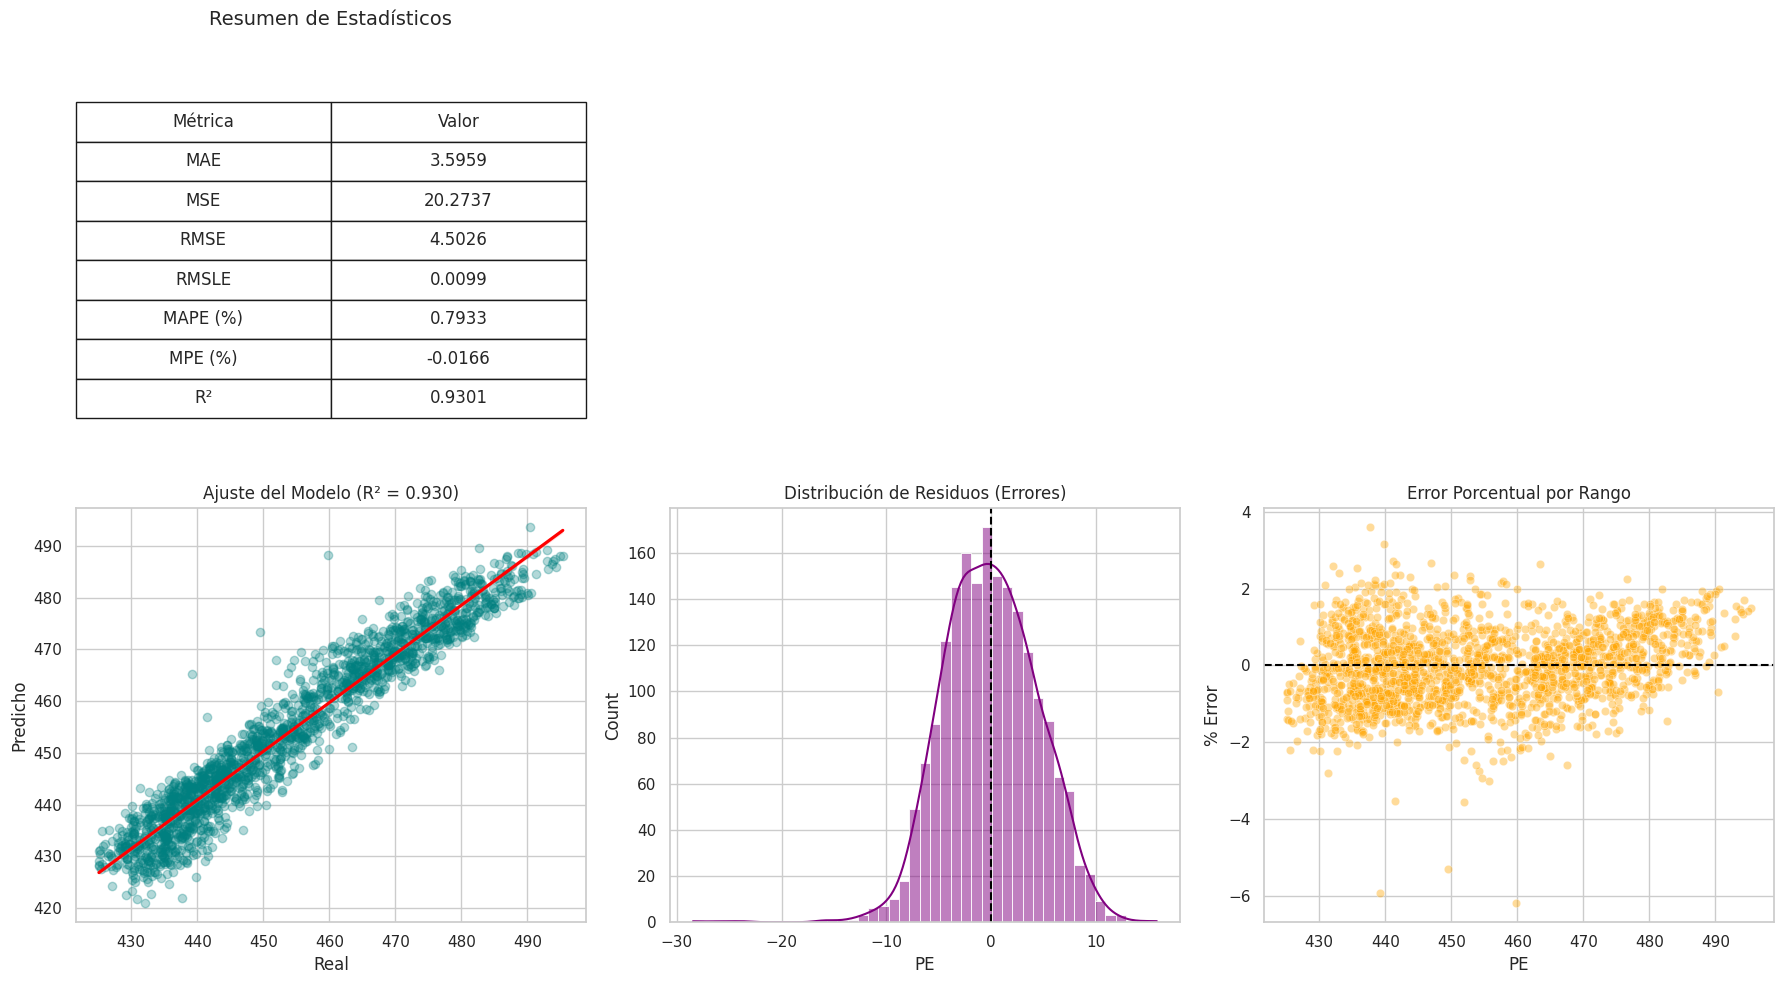


Cálculos finalizados con éxito.


In [6]:
# ---------------------------------------------------------
# 6. VISUALIZACIÓN DE ESTADÍSTICOS
# ---------------------------------------------------------
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3)

# Subtrama 1: Tabla de Métricas
ax_table = fig.add_subplot(gs[0, 0])
ax_table.axis('off')
table_data = [[k, f"{v:.4f}"] for k, v in metrics_dict.items()]
table = ax_table.table(cellText=table_data, colLabels=['Métrica', 'Valor'],
                       loc='center', cellLoc='center')
table.scale(1, 2)
ax_table.set_title("Resumen de Estadísticos", fontsize=14, pad=20)

# Subtrama 2: Dispersión y Ajuste (Visualización del R²)
ax_scatter = fig.add_subplot(gs[1, 0])
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3, 'color':'teal'},
            line_kws={'color':'red'}, ax=ax_scatter)
ax_scatter.set_title(f"Ajuste del Modelo (R² = {r2:.3f})")
ax_scatter.set_xlabel("Real")
ax_scatter.set_ylabel("Predicho")

# Subtrama 3: Distribución de Errores (Residuos)
ax_res = fig.add_subplot(gs[1, 1])
residuos = y_test - y_pred
sns.histplot(residuos, kde=True, color='purple', ax=ax_res)
ax_res.axvline(0, color='black', linestyle='--')
ax_res.set_title("Distribución de Residuos (Errores)")

# Subtrama 4: Error Porcentual vs Valor Real
ax_perc = fig.add_subplot(gs[1, 2])
error_porcentual = ((y_test - y_pred) / y_test) * 100
sns.scatterplot(x=y_test, y=error_porcentual, alpha=0.4, color='orange', ax=ax_perc)
ax_perc.axhline(0, color='black', linestyle='--')
ax_perc.set_title("Error Porcentual por Rango")
ax_perc.set_ylabel("% Error")

plt.tight_layout()
plt.show()

print("\nCálculos finalizados con éxito.")

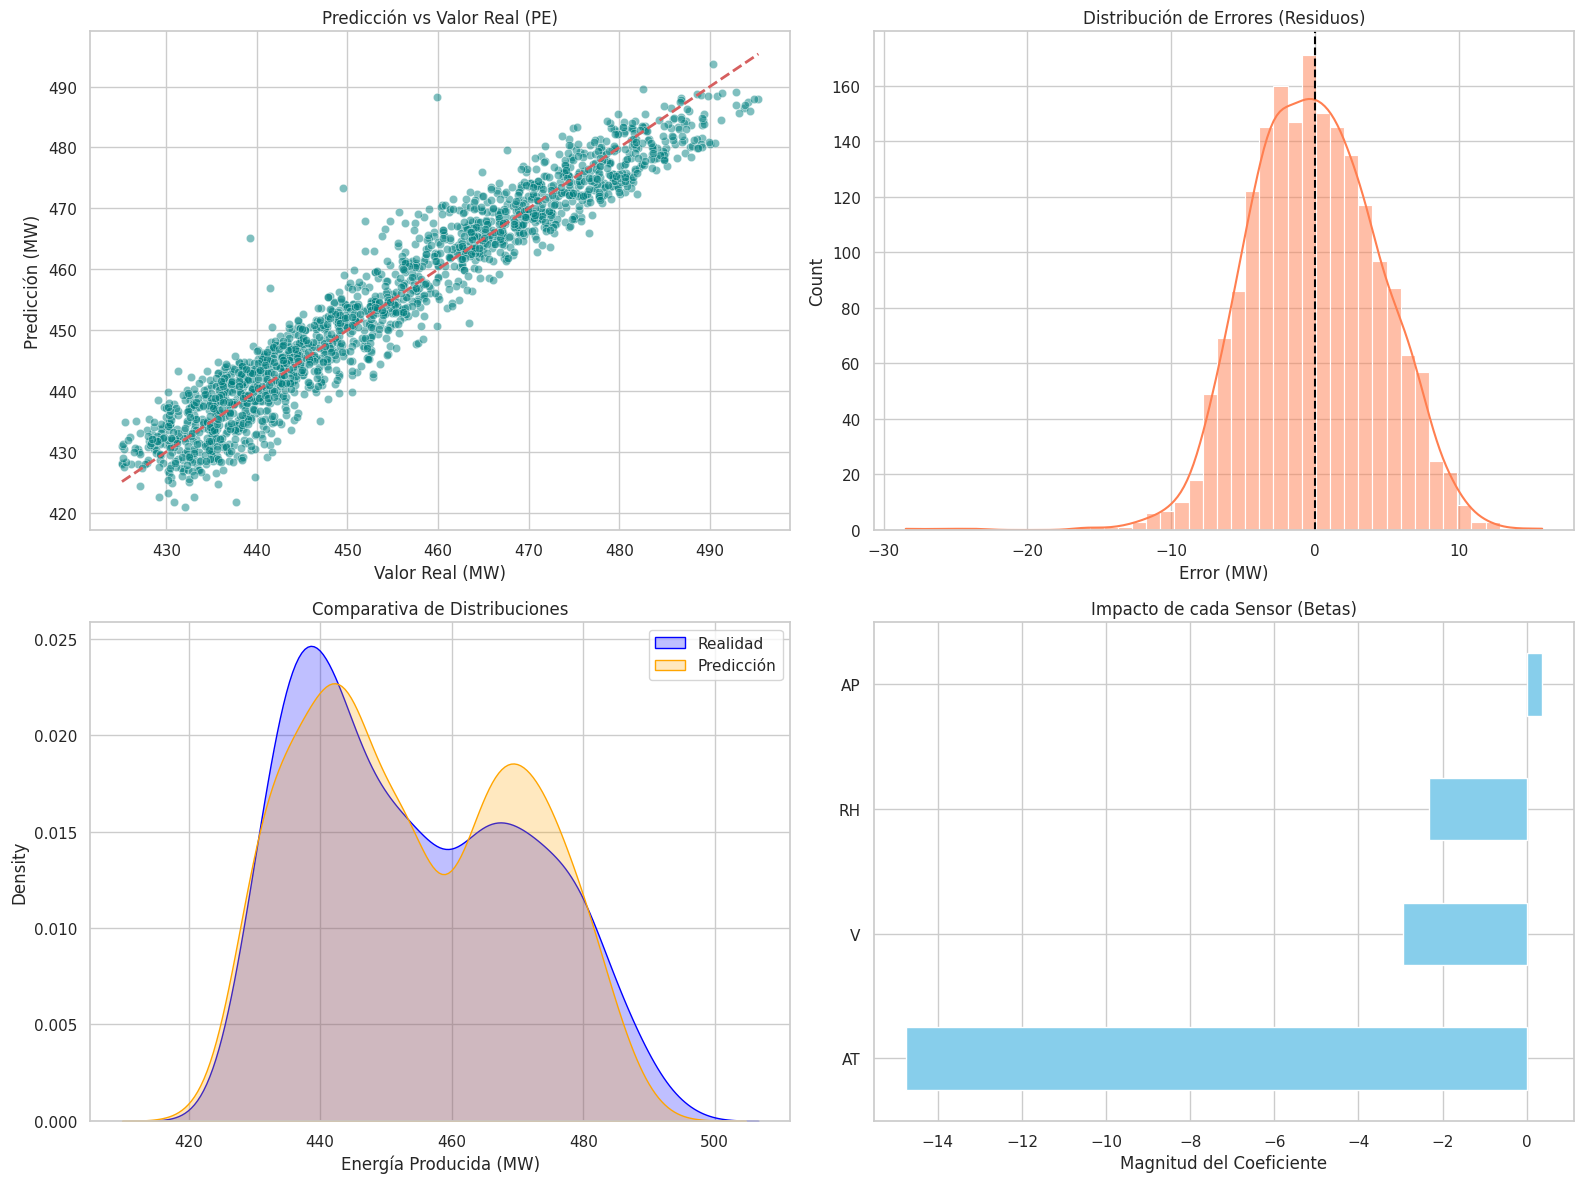

'\nANÁLISIS DEL DIAGNÓSTICO:\n1. Predicción vs Real: Si los puntos siguen la línea roja, el modelo es preciso.\n2. Histograma de Errores: Si tiene forma de campana centrada en cero, los \n   errores son aleatorios (buena señal). Si está sesgada, falta información.\n3. Distribución Real vs Predicha: El solapamiento indica qué tan bien \n   capturamos la variabilidad de la planta.\n'

In [7]:
# ---------------------------------------------------------
# 7. VISUALIZACIÓN DE DIAGNÓSTICO AVANZADO
# ---------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# GRAFICO 1: Dispersión Predicción vs Realidad
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, ax=axes[0, 0], color='teal')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
axes[0, 0].set_title('Predicción vs Valor Real (PE)')
axes[0, 0].set_xlabel('Valor Real (MW)')
axes[0, 0].set_ylabel('Predicción (MW)')

# GRAFICO 2: Distribución de Errores (Residuos)
residuos = y_test - y_pred
sns.histplot(residuos, kde=True, ax=axes[0, 1], color='coral')
axes[0, 1].axvline(0, color='black', linestyle='--')
axes[0, 1].set_title('Distribución de Errores (Residuos)')
axes[0, 1].set_xlabel('Error (MW)')

# GRAFICO 3: Distribuciones Comparadas (Real vs Predicho)
sns.kdeplot(y_test, label='Realidad', ax=axes[1, 0], fill=True, color='blue')
sns.kdeplot(y_pred, label='Predicción', ax=axes[1, 0], fill=True, color='orange')
axes[1, 0].set_title('Comparativa de Distribuciones')
axes[1, 0].set_xlabel('Energía Producida (MW)')
axes[1, 0].legend()

# GRAFICO 4: Importancia de Variables (Estandarizadas)
importancias = pd.Series(model.coef_, index=X.columns).sort_values()
importancias.plot(kind='barh', ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title('Impacto de cada Sensor (Betas)')
axes[1, 1].set_xlabel('Magnitud del Coeficiente')

plt.tight_layout()
plt.show()

"""
ANÁLISIS DEL DIAGNÓSTICO:
1. Predicción vs Real: Si los puntos siguen la línea roja, el modelo es preciso.
2. Histograma de Errores: Si tiene forma de campana centrada en cero, los
   errores son aleatorios (buena señal). Si está sesgada, falta información.
3. Distribución Real vs Predicha: El solapamiento indica qué tan bien
   capturamos la variabilidad de la planta.
"""